In [4]:
import numpy as np
import torch


In [75]:
t = torch.Tensor(2, 3, 4)
print(t.shape, t.size())
print(t)

torch.Size([2, 3, 4]) torch.Size([2, 3, 4])
tensor([[[-4.5121e+30,  4.5716e-41, -4.5121e+30,  4.5716e-41],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  3.4108e-36,  1.8788e+31,  1.7220e+22]],

        [[ 2.1715e-18,  2.0892e+20,  6.7575e-07,  2.6879e-06],
         [ 5.4168e-05,  3.2503e+21,  2.1864e+23,  8.1254e+20],
         [ 3.2907e+21,  1.7297e-04,  1.2914e+19,  6.7127e-07]]])


In [77]:
t.random_(10) # underscore => in-place

tensor([[[9., 2., 0., 7.],
         [7., 4., 5., 9.],
         [9., 6., 5., 4.]],

        [[0., 9., 4., 6.],
         [0., 9., 8., 1.],
         [3., 5., 2., 4.]]])

In [98]:
A_np = np.random.rand(2,3,4)
A = torch.from_numpy(A_np)
print(A)
print(A.dtype)

tensor([[[0.1900, 0.1469, 0.9982, 0.7219],
         [0.1444, 0.9566, 0.0590, 0.6956],
         [0.2230, 0.5899, 0.9404, 0.3127]],

        [[0.8479, 0.7249, 0.1674, 0.8323],
         [0.3492, 0.8819, 0.0033, 0.0173],
         [0.2884, 0.1516, 0.1133, 0.4890]]], dtype=torch.float64)
torch.float64


In [99]:
A_fp16  = A.to(torch.float16)
print(A_fp16)
print(A_fp16.dtype)

B = A_fp16.numpy()
print(type(B))

tensor([[[0.1899, 0.1469, 0.9980, 0.7217],
         [0.1444, 0.9565, 0.0591, 0.6958],
         [0.2230, 0.5898, 0.9404, 0.3127]],

        [[0.8477, 0.7251, 0.1674, 0.8320],
         [0.3491, 0.8818, 0.0033, 0.0173],
         [0.2883, 0.1516, 0.1133, 0.4890]]], dtype=torch.float16)
torch.float16
<class 'numpy.ndarray'>


In [3]:
A = torch.Tensor([[1,1],[2,2]])
B = torch.Tensor([[1,2],[3,4]])
print(A @ B)
print(A.matmul(B))

tensor([[ 4.,  6.],
        [ 8., 12.]])
tensor([[ 4.,  6.],
        [ 8., 12.]])


In [4]:
print(f"Initial device: {A.device}")

if torch.cuda.is_available():
    device = torch.device("cuda:3")
else:
    device = "cpu"

A = A.to(device)
print(f"New device: {A.device}")


Initial device: cpu
New device: cuda:3


In [5]:
from datetime import datetime

N = int(2e4)
A_cpu = torch.rand(N, N)

start_time = datetime.now()
A_cpu @ A_cpu
print(f"Total time: {datetime.now() - start_time}")

A_gpu = A_cpu.to(device)
start_time = datetime.now()
A_gpu @ A_gpu
print(f"Total time: {datetime.now() - start_time}")

Total time: 0:00:09.954784
Total time: 0:00:00.843644


In [1]:
import random

import math
from IPython import display
from matplotlib import pyplot as plt
from torch import nn, optim
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim


def plot_scatter(X, y, d=0, auto=False, zoom=1):
    X = X.cpu()
    y = y.cpu()
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True: plt.axis('equal')
    # plt.axis('off')

    # _m, _c = 0, '.15'
    # plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    # plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)

def plot_model(X, y, model):
    model.cpu()
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    with torch.no_grad():
        data = torch.from_numpy(np.vstack((xx.reshape(-1), yy.reshape(-1))).T).float()
        Z = model(data).detach()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_scatter(X, y)

In [2]:
plt.rc('figure', figsize=(5,5), dpi=100)

In [5]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
print(device)

cuda:3


In [6]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes

In [7]:
X_cpu = torch.zeros(N * C, D)
y_cpu = torch.zeros(N * C, dtype=torch.long)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    inner_var = torch.linspace((2 * math.pi / C) * (c), 
                               (2 * math.pi / C) * (2 + c), N) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X_cpu[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y_cpu[ix] = c
        index += 1

print(f"Shapes: X = {tuple(X_cpu.size())}, Y = {tuple(y_cpu.size())} ")

Shapes: X = (3000, 2), Y = (3000,) 


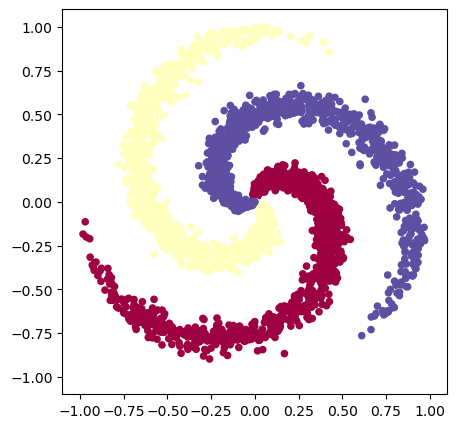

In [8]:
plot_scatter(X_cpu, y_cpu)

In [9]:
X = X_cpu.to(device)
y = y_cpu.to(device)

In [10]:
def train_model(X, y, model, loss_fn, optimizer, n_epochs):
    accuracies = []
    losses = []

    for t in range(n_epochs):
        # Feed forward to get the logits
        y_pred = model(X)
        
        # Compute the loss and accuracy
        loss = loss_fn(y_pred, y)
        score, predicted = torch.max(y_pred, 1)
        acc = (y == predicted).sum().float() / len(y)
        # print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
        # display.clear_output(wait=True)

        # Store loss and accuracy
        accuracies.append(acc.item())
        losses.append(loss.item())

        # zero the gradients before running
        # the backward pass.
        optimizer.zero_grad()
        
        # Backward pass to compute the gradient
        # of loss w.r.t our learnable params. 
        loss.backward()
        
        # Update params
        optimizer.step()
    
    return accuracies, losses

(0.0, 1.2208094835281373)

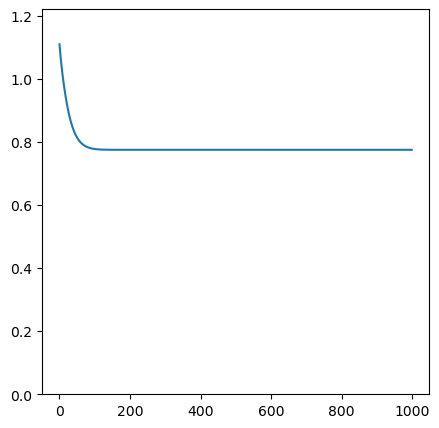

In [11]:
H = 100
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H,C)
)
model.to(device)


learning_rate =  1e-3
decay_factor = 1e-5
criteria = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=decay_factor)

accuracies, losses = train_model(X, y, model, loss_fn = criteria, optimizer = optimizer, n_epochs = 1000)
plt.plot(losses)
ax = plt.gca()
ax.set_ylim([0,np.max(losses)*1.1])

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


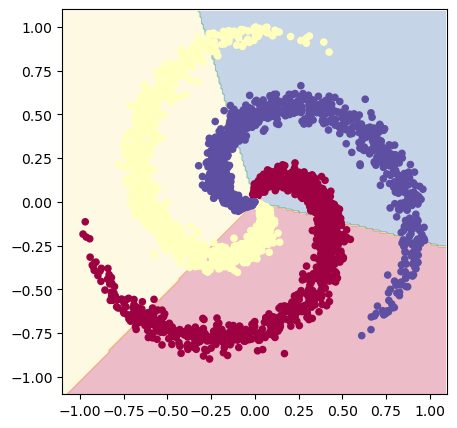

In [12]:
print(model)
plot_model(X, y, model)

(0.0, 1.2353882789611816)

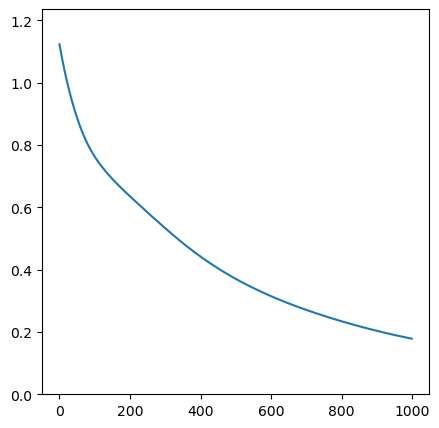

In [13]:
H = 100
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

learning_rate =  1e-3
decay_factor = 1e-5
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=decay_factor)


accuracies, losses = train_model(X, y, model, loss_fn = criteria, optimizer = optimizer, n_epochs = 1000)
plt.plot(losses)
ax = plt.gca()
ax.set_ylim([0,np.max(losses)*1.1])

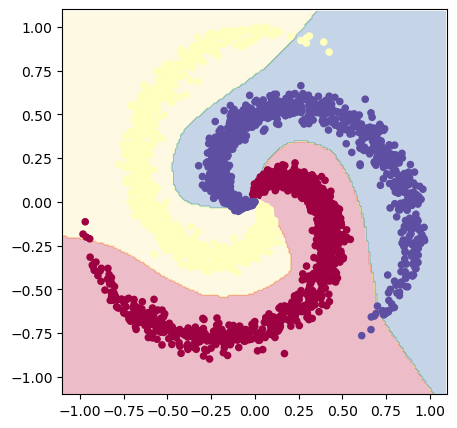

In [14]:
plot_model(X, y, model)

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

def model_size(model):
    n = 0
    for p in list(model.parameters()):
        n += p.nelement()
    return n

training_data = datasets.MNIST('./data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

test_data = datasets.MNIST('./data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

input_size = 28 * 28    # image dimensions
output_size = 10        # num classes

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



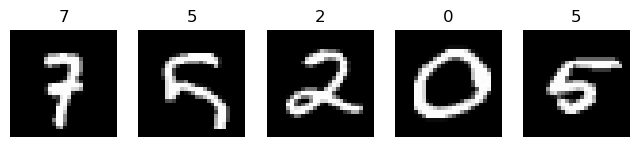

In [17]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 1
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [18]:
train_loader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 1000, shuffle=True)

In [19]:
class CNN(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNN, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=n_feature, kernel_size=5)
        self.conv2 = nn.Conv2d(n_feature, n_feature, kernel_size=5)
        self.fc1 = nn.Linear(n_feature*4*4, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, self.n_feature*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [20]:
accuracy_list = []

def train(epoch, model):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)

        # Optimize
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(model):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)

        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

In [21]:
# Training settings 
n_features = 6 # number of feature maps

model_cnn = CNN(input_size, n_features, output_size)
model_cnn.to(device)
optimizer = optim.SGD(model_cnn.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(model_size(model_cnn)))

for epoch in range(0, 2):
    train(epoch, model_cnn)
    test(model_cnn)

Number of parameters: 6422
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.285697
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.864349
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.692146
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.464722
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.305641
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.381705
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.271619
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.238493
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.176968
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.202509

Test set: Average loss: 0.1674, Accuracy: 9516/10000 (95%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.098271
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.215847
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.339889
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.104380
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.143280
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.176726
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.103839
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.080444
Train Epoch: 1 [51200/60

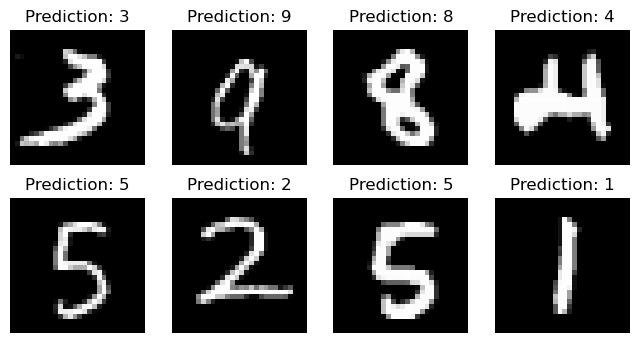

In [22]:
figure = plt.figure(figsize=(8,4))
cols, rows = 4, 2

for i in range(1, cols * rows + 1):

    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[sample_idx]
    
    model.eval()
    img = img.to(device)
    output = model_cnn(img)
    pred = output.data.max(1, keepdim=True)[1]

    figure.add_subplot(rows, cols, i)
    plt.title(f"Prediction: {label}")
    plt.axis("off")
    plt.imshow(img.cpu().squeeze(), cmap="gray")
